**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 6 – Support Vector Machine

Nok Wongpiromsarn, 10 August 2022

**Instructions:**
1. Construct a pandas dataframe from Iris dataset.
2. Remove outliers. Here, we define outliers as those that are beyond 1.5 times the IQR above the upper quartile or below the lower quartile.
3. Apply each of the following methods to deal with the missing features. Discuss the differences in the data obtained from these methods.
   - dropna
   - fillna
   - SimpleImputer
4. Use the dataframe obtained from dropna. Visualize the data to see which pairs of the 3 species (setosa, versicolor, virginica) are linearly separable.
5. Construct features X and labels y.
   - X contains only the petal length and petal width features.
   - y is a binary target such that it is 1 if the instance is Virginica and is 0 otherwise.
6. Train LinearSVC, SVC, and SGDClassifier to identify whether a given instance is Virginica. Use C = 1. Don't forget to scale your data!
7. Pick one of the 3 classifiers and report the following performance measures.
   1. training accuracy
   2. cross-validation accuracy
   3. confusion matrix
   4. precision
   5. recall
   6. F1
   7. AUC

### 1. Construct a pandas dataframe from Iris dataset

In [1]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
df_feature = pd.DataFrame(iris['data'], columns = iris.feature_names)
df_label = pd.DataFrame(iris['target'], columns = ['species'])
df = pd.concat([df_feature, df_label], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### 2. Remove outliers.

Here, we define outliers as those that are beyond 1.5 times the IQR above the upper quartile or below the lower quartile.

**2.1 Use boxplot to determine outliers.**

<AxesSubplot:>

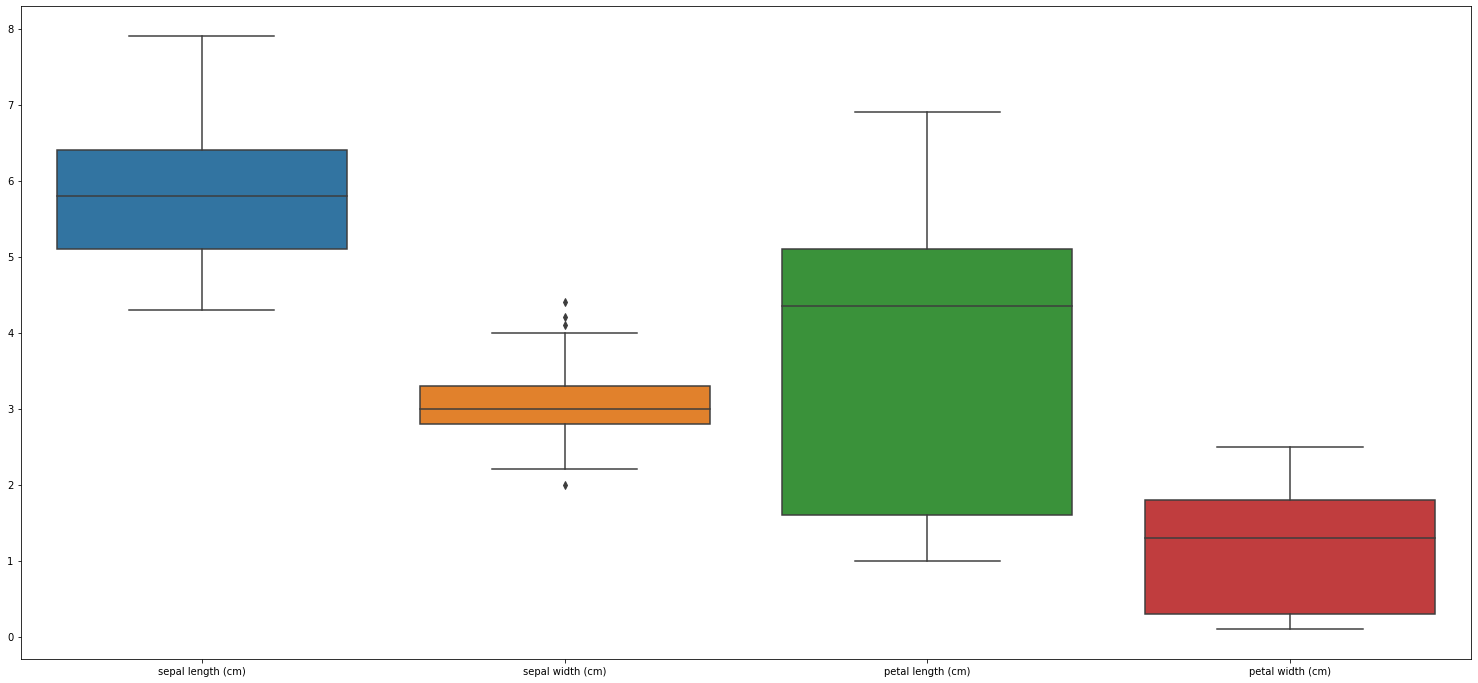

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(26, 12))
sns.boxplot(data=df[iris.feature_names])

**2.2 Replace all the outliers with NaN.**

In [3]:
import numpy as np

Q3 = df['sepal width (cm)'].quantile(0.75)
Q1 = df['sepal width (cm)'].quantile(0.25)
IQR = Q3 - Q1

# Set the values of sepal width that are beyond 1.5 times the IQR above the upper quartile as NaN
df.loc[df['sepal width (cm)'] > Q3 + 1.5*IQR, 'sepal width (cm)'] = np.nan

# TODO: Set other outliers as NaN
df.loc[df['sepal width (cm)'] < Q1 - 1.5*IQR, 'sepal width (cm)'] = np.nan

# Call info to verify that NaN values show up as null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   146 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### 3. Apply each of the following methods to deal with the missing features

- dropna
- fillna
- SimpleImputer

First, we identify all the rows with null

In [4]:
rows_with_null = df.isnull().any(axis=1)
df[rows_with_null]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
15,5.7,NaN,1.5,0.4,0
32,5.2,NaN,1.5,0.1,0
33,5.5,NaN,1.4,0.2,0
60,5.0,NaN,3.5,1.0,1


**3.1 dropna**

In [5]:
df_dropna = df.dropna(subset=["sepal width (cm)"])

# TODO: Use a combination of info(), head(), describe(), and X_dropna[rows_with_null] 
# to see the difference between df and df_dropna
print(df_dropna[rows_with_null])
df_dropna.info()

Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), species]
Index: []
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  146 non-null    float64
 1   sepal width (cm)   146 non-null    float64
 2   petal length (cm)  146 non-null    float64
 3   petal width (cm)   146 non-null    float64
 4   species            146 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.8 KB


/tmp/ipykernel_13241/690669317.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df_dropna[rows_with_null])


**3.2 fillna**

In [6]:
# TODO: Change val to some other value that is not the mean of df['sepal width (cm)']
val = df['sepal width (cm)'].median()
df_fillna = df.copy()
df_fillna['sepal width (cm)'] = df['sepal width (cm)'].fillna(val)

# TODO: Use a combination of info(), head(), describe(), and df_fillna[rows_with_null] 
# to see the difference between df and df_fillna
print(df_fillna[rows_with_null])
df_fillna.info()

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               3.0                1.5               0.4   
32                5.2               3.0                1.5               0.1   
33                5.5               3.0                1.4               0.2   
60                5.0               3.0                3.5               1.0   

    species  
15        0  
32        0  
33        0  
60        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**3.3 SimpleImputer**

In [7]:
from sklearn.impute import SimpleImputer

# TODO: Change strategy to something that is not "mean"
imputer = SimpleImputer(strategy="median")
df_imputer = imputer.fit_transform(df)

# TODO: Check the type of df_imputer and call df_imputer[rows_with_null]
# to see the difference between df, df_fillna, and df_imputer
print(df_imputer[rows_with_null])
print(type(df_imputer))

[[5.7 3.  1.5 0.4 0. ]
 [5.2 3.  1.5 0.1 0. ]
 [5.5 3.  1.4 0.2 0. ]
 [5.  3.  3.5 1.  1. ]]
<class 'numpy.ndarray'>


### 4. Visualize the data to see which pair of the 3 species are linearly separable.

First, we separate the input based on their labels to help with plotting

In [8]:
X_setosa = df_dropna.loc[df_dropna['species'] == 0, iris.feature_names]
X_versicolor = df_dropna.loc[df_dropna['species'] == 1, iris.feature_names]
X_virginica = df_dropna.loc[df_dropna['species'] == 2, iris.feature_names]

**4.1 Scatter plot of sepal length VS sepal width. Use different color for different species.**

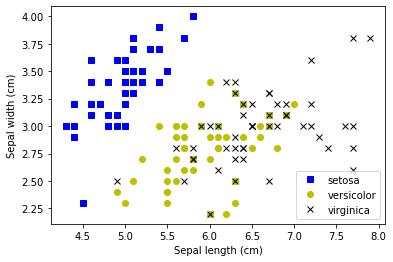

In [9]:
plt.plot(X_setosa['sepal length (cm)'], X_setosa['sepal width (cm)'], 'bs', label='setosa')
plt.plot(X_versicolor['sepal length (cm)'], X_versicolor['sepal width (cm)'], 'yo', label='versicolor')
plt.plot(X_virginica['sepal length (cm)'], X_virginica['sepal width (cm)'], 'kx', label='virginica')
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.show()

**4.2 Scatter plot of petal length VS petal width. Use different color for different species.**

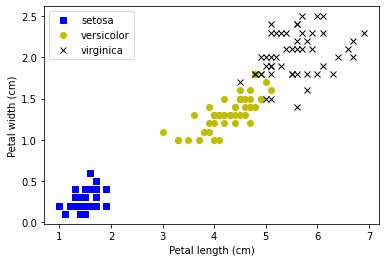

In [10]:
plt.plot(X_setosa['petal length (cm)'], X_setosa['petal width (cm)'], 'bs', label='setosa')
plt.plot(X_versicolor['petal length (cm)'], X_versicolor['petal width (cm)'], 'yo', label='versicolor')
plt.plot(X_virginica['petal length (cm)'], X_virginica['petal width (cm)'], 'kx', label='virginica')
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()
plt.show()

### 5. Construct features X and labels y. 

- X contains only the petal length and petal width features.
- y is a binary target such that it is 1 if the instance is Virginica and is 0 otherwise.

In [11]:
X = df_dropna[['petal length (cm)', 'petal width (cm)']] # petal length, petal width
y = df_dropna['species'] == np.argmax(iris['target_names'] == 'virginica')

### 6. Train LinearSVC, SVC, and SGDClassifier to identify whether a given instance is Virginica.

In [12]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 1
alpha = 1 / (C * len(X))

# Construct the classifiers
lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", alpha=alpha, max_iter=1000, tol=1e-3, random_state=42)

# Scale the features and train the classifiers
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y);
svm_clf.fit(X_scaled, y);
sgd_clf.fit(X_scaled, y);

### 4. Pick one of the 3 classifiers and report the following performance measures

- training accuracy
- cross-validation accuracy
- confusion matrix
- precision
- recall
- F1
- AUC


In [13]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_scaled)
print(accuracy_score(y, y_pred))

0.952054794520548


In [14]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(lin_clf, X_scaled, y, cv=3, scoring="accuracy"))

[0.97959184 0.95918367 0.91666667]


In [15]:
from sklearn.model_selection import cross_val_predict
y_pred_cross = cross_val_predict(lin_clf, X_scaled, y, cv=3)

# Compute the confusion matrix by passing the target (y_train_5)
# and the prediction (y_train_pred)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred_cross))

[[93  3]
 [ 4 46]]


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y, y_pred_cross))
print(recall_score(y, y_pred_cross))
print(f1_score(y, y_pred_cross))

0.9387755102040817
0.92
0.9292929292929293


In [17]:
from sklearn.metrics import roc_auc_score

y_scores = cross_val_predict(lin_clf, X_scaled, y, cv=3, 
                             method="decision_function")
roc_auc_score(y, y_scores)

0.9955208333333333

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y, y_pred_cross))
print(recall_score(y, y_pred_cross))
print(f1_score(y, y_pred_cross))

0.9387755102040817
0.92
0.9292929292929293
